# Gender Classification using VGG-16

In [42]:
import scipy.io
mat = scipy.io.loadmat('DL_Project/wiki.mat')
import numpy as np
from PIL import Image

import scipy
import scipy.io as sio
import numpy as np
from PIL import Image
import math
import os
from keras.models import Sequential
from keras.layers import *
from keras.layers.advanced_activations import PReLU
#utilities help us transform our data
from keras.utils import * 
#from sklearn.cross_validation import train_test_split
rows, cols = 64,64
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
import tensorflow as tf

import cv2
from keras.models import load_model
from statistics import mode
#from utils import preprocess_input
#from utils import *
from random import shuffle

In [43]:
instances = mat['wiki'][0][0][0].shape[1]
 
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]
 
import pandas as pd
df2 = pd.DataFrame(index = range(0,instances), columns = columns)
 
for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            df2[columns[j]] = pd.DataFrame(current_array[j][0])

In [44]:
df2

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,[Krista Tippett],"[[274.76563240288175, 57.7700900839337, 376.88...",4.748056,NaN
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,[Bernie Whitebear],"[[79.35580188693945, 26.65993396231315, 197.60...",4.184828,NaN
7,695763,1982,[39/100039_1904-12-07_1982.jpg],1.0,[Clarence Nash],"[[152.9073113210374, 95.90456957564838, 323.01...",3.006350,1.103340
8,711000,2007,[13/10004113_1946-08-26_2007.jpg],1.0,[William W. Destler],"[[1, 1, 1, 1]]",-inf,NaN
9,723987,2011,[22/10004122_1982-03-17_2011.jpg],1.0,[Daniel Smith],"[[1, 1, 592, 440]]",-inf,NaN


In [45]:
#remove pictures does not include face
df2 = df2[df2['face_score'] != -np.inf]
 
#some pictures include more than one face, remove them
df2 = df2[df2['second_face_score'].isna()]
 
#check threshold
df2 = df2[df2['face_score'] >= 3]
 
#some records do not have a gender information
df2 = df2[~df2['gender'].isna()]
 
df2 = df2.drop(columns = ['name','face_score','second_face_score','dob','face_location'])


In [46]:
df = df2.iloc[1:4000]

In [47]:
df

,photo_taken,full_path,gender
2,2008,[12/100012_1948-07-03_2008.jpg],1.0
4,2012,[16/10002116_1971-05-31_2012.jpg],0.0
5,2012,[02/10002702_1960-11-09_2012.jpg],0.0
6,1971,[41/10003541_1937-09-27_1971.jpg],1.0
10,1950,[99/10004299_1908-08-19_1950.jpg],1.0
11,1969,[56/1000456_1933-06-12_1969.jpg],1.0
12,2010,[82/10004882_1987-05-16_2010.jpg],1.0
15,2006,[47/10005947_1981-04-07_2006.jpg],0.0
17,2010,[50/10006850_1973-08-17_2010.jpg],1.0
19,2008,[81/1000781_1930-07-07_2008.jpg],1.0


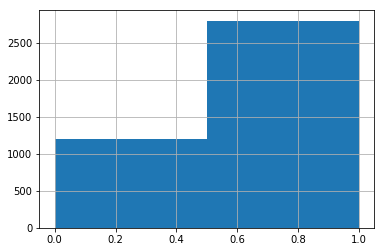

In [48]:
histogram_gender = df['gender'].hist(bins=df['gender'].nunique())
histogram_gender

In [49]:
from keras.preprocessing import image
target_size = (224, 224)
 
def getImagePixels(image_path):
    img = image.load_img("DL_Project/wiki_crop/%s" % image_path[0], grayscale=False, target_size=target_size)
    x = image.img_to_array(img).reshape(1, -1)[0]
    #x = preprocess_input(x)
    return x
 
df['pixels'] = df['full_path'].apply(getImagePixels)

/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [50]:
df

,photo_taken,full_path,gender,pixels
2,2008,[12/100012_1948-07-03_2008.jpg],1.0,"[92.0, 97.0, 91.0, 89.0, 94.0, 90.0, 91.0, 96...."
4,2012,[16/10002116_1971-05-31_2012.jpg],0.0,"[61.0, 30.0, 10.0, 61.0, 30.0, 10.0, 61.0, 30...."
5,2012,[02/10002702_1960-11-09_2012.jpg],0.0,"[97.0, 122.0, 178.0, 97.0, 122.0, 178.0, 97.0,..."
6,1971,[41/10003541_1937-09-27_1971.jpg],1.0,"[190.0, 189.0, 194.0, 204.0, 203.0, 208.0, 203..."
10,1950,[99/10004299_1908-08-19_1950.jpg],1.0,"[75.0, 70.0, 66.0, 78.0, 73.0, 69.0, 81.0, 76...."
11,1969,[56/1000456_1933-06-12_1969.jpg],1.0,"[174.0, 174.0, 174.0, 174.0, 174.0, 174.0, 173..."
12,2010,[82/10004882_1987-05-16_2010.jpg],1.0,"[187.0, 186.0, 192.0, 187.0, 186.0, 192.0, 187..."
15,2006,[47/10005947_1981-04-07_2006.jpg],0.0,"[75.0, 2.0, 47.0, 78.0, 2.0, 49.0, 82.0, 2.0, ..."
17,2010,[50/10006850_1973-08-17_2010.jpg],1.0,"[207.0, 208.0, 194.0, 207.0, 208.0, 194.0, 207..."
19,2008,[81/1000781_1930-07-07_2008.jpg],1.0,"[28.0, 31.0, 38.0, 28.0, 31.0, 40.0, 28.0, 30...."


In [51]:
import keras
import keras.utils
from keras import utils as np_utils

classes = 101
target = df['gender'].values
target_classes = keras.utils.to_categorical(target, 2)
features = []
 
for i in range(0, df.shape[0]):
    features.append(df['pixels'].values[i])
features = np.array(features)
features = features.reshape(features.shape[0], 224, 224, 3)

In [52]:
features

array([[[[ 92.,  97.,  91.],
         [ 89.,  94.,  90.],
         [ 91.,  96.,  92.],
         ...,
         [108., 112., 113.],
         [108., 112., 113.],
         [108., 112., 113.]],

        [[ 90.,  95.,  89.],
         [ 93.,  98.,  94.],
         [ 95., 100.,  96.],
         ...,
         [106., 110., 111.],
         [106., 110., 111.],
         [106., 110., 111.]],

        [[ 89.,  94.,  88.],
         [ 93.,  98.,  94.],
         [ 93.,  98.,  94.],
         ...,
         [104., 110., 110.],
         [104., 110., 110.],
         [104., 110., 110.]],

        ...,

        [[ 22.,  28.,  40.],
         [ 23.,  27.,  36.],
         [ 31.,  32.,  37.],
         ...,
         [ 30.,  31.,  35.],
         [ 30.,  31.,  35.],
         [ 30.,  31.,  35.]],

        [[ 22.,  28.,  40.],
         [ 23.,  27.,  36.],
         [ 31.,  32.,  37.],
         ...,
         [ 30.,  31.,  35.],
         [ 30.,  31.,  35.],
         [ 30.,  31.,  35.]],

        [[ 22.,  28.,  40.],
       

In [53]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, target_classes, test_size=0.30)

In [54]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [55]:
#pre-trained weights of vgg-face model.
#you can find it here: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
#related blog post: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
model.load_weights('DL_Project/vgg_face_weights.h5')


In [56]:
from keras.models import Model, Sequential
for layer in model.layers[:-7]:
    layer.trainable = False
base_model_output = Sequential()
base_model_output = Convolution2D(2, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)
 
gender_model = Model(inputs=model.input, outputs=base_model_output)

#### Custom image

In [57]:
def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    test_img /= 255
    return test_img

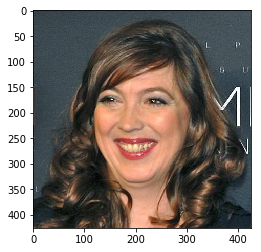

gender:  Female


In [61]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

picture = 'DL_Project/test/test_female.jpg'
prediction = gender_model.predict(loadImage(picture))
 
img = image.load_img(picture)#, target_size=(224, 224))
plt.imshow(img)
plt.show()
gender = "Male" if np.argmax(prediction) == 1 else "Female"
print("gender: ", gender)

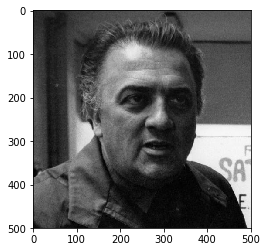

gender:  Female


In [62]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

picture = 'DL_Project/test/male2.jpg'
prediction = gender_model.predict(loadImage(picture))
 
img = image.load_img(picture)#, target_size=(224, 224))
plt.imshow(img)
plt.show()
gender = "Male" if np.argmax(prediction) == 1 else "Female"
print("gender: ", gender)